#from imagenet_utils import preprocess_input, decode_predictions

In [1]:
import keras
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

Using TensorFlow backend.


In [2]:
from IPython.display import Image

In [3]:
model = ResNet50(weights='resnet50_weights_tf_kernels.h5')

In [4]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

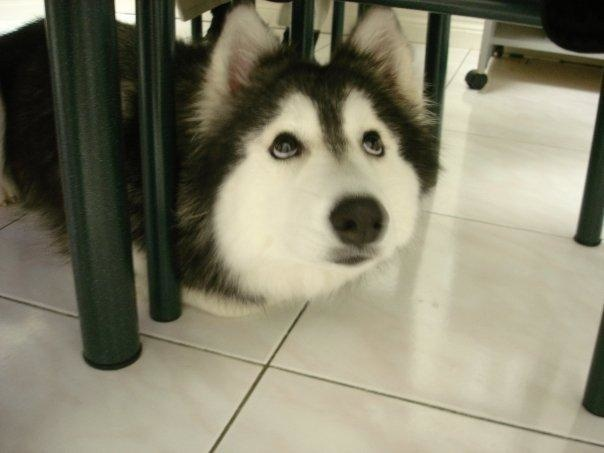

In [5]:
Image(filename='imagetest.jpg', width=420)


In [6]:
img_path = 'imagetest.jpg'
img = image.load_img(img_path, target_size=(224, 224))

In [7]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [16]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=5))

Predicted: [[('n02110063', 'malamute', 0.41641662), ('n02110185', 'Siberian_husky', 0.3049947), ('n02109961', 'Eskimo_dog', 0.2463491), ('n04501370', 'turnstile', 0.01420762), ('n02111889', 'Samoyed', 0.0016917008)]]


In [17]:
decode_predictions(preds, top=5)

[[('n02110063', 'malamute', 0.41641662),
  ('n02110185', 'Siberian_husky', 0.3049947),
  ('n02109961', 'Eskimo_dog', 0.2463491),
  ('n04501370', 'turnstile', 0.01420762),
  ('n02111889', 'Samoyed', 0.0016917008)]]

In [18]:
decode_predictions(preds, top=5)[0]

[('n02110063', 'malamute', 0.41641662),
 ('n02110185', 'Siberian_husky', 0.3049947),
 ('n02109961', 'Eskimo_dog', 0.2463491),
 ('n04501370', 'turnstile', 0.01420762),
 ('n02111889', 'Samoyed', 0.0016917008)]

In [19]:
decode_predictions(preds, top=5)[0][0]

('n02110063', 'malamute', 0.41641662)

In [20]:
decode_predictions(preds, top=5)[0][0][1]

'malamute'

In [34]:
catgrys = []

In [35]:
catgrys = decode_predictions(preds, top =1000)

In [43]:
count = 0

In [40]:
for i in range(1000):
    if catgrys[0][0][i] is catgry:
        count +=1;

In [66]:
Myclasses = []

In [126]:
for i in range(1000):
    #print(allclasses[i][1])
    Myclasses.append(allclasses[i][1])

In [74]:
SivaClasses = np.array(Myclasses)

In [76]:
SivaClasses.shape

(1000,)

In [250]:
Classes = sorted(SivaClasses)

In [122]:
MyClasses = np.column_stack((sorted(SivaClasses),count))

In [110]:
import csv
import random

In [252]:
data = (str(datum) for datum in Classes)
data = '\n'.join(data) + '\n'
with open("Classes_ImageNet.csv", "w") as fp:
    fp.write(data)

In [186]:
print(decode_predictions(preds)[0][2][1])
for node in MyClasses:
     if node[0] == decode_predictions(preds)[0][2][1]:
        node[1] = (str(float(node[1])+ 1))
        print(node[0],node[1])

Eskimo_dog
Eskimo_dog 1.0


### Check the Maximum Obtained Class

In [190]:
for node in MyClasses:
    if float(node[1])==2:
        print(node[0], node[1])

malamute 2.0


In [191]:
MyClasses

array([['Afghan_hound', '0.0'],
       ['African_chameleon', '0.0'],
       ['African_crocodile', '0.0'],
       ..., 
       ['yurt', '0.0'],
       ['zebra', '0.0'],
       ['zucchini', '0.0']],
      dtype='<U32')

In [193]:
for node in MyClasses:
    print(node[0])

Afghan_hound
African_chameleon
African_crocodile
African_elephant
African_grey
African_hunting_dog
Airedale
American_Staffordshire_terrier
American_alligator
American_black_bear
American_chameleon
American_coot
American_egret
American_lobster
Angora
Appenzeller
Arabian_camel
Arctic_fox
Australian_terrier
Band_Aid
Bedlington_terrier
Bernese_mountain_dog
Blenheim_spaniel
Border_collie
Border_terrier
Boston_bull
Bouvier_des_Flandres
Brabancon_griffon
Brittany_spaniel
CD_player
Cardigan
Chesapeake_Bay_retriever
Chihuahua
Christmas_stocking
Crock_Pot
Dandie_Dinmont
Doberman
Dungeness_crab
Dutch_oven
Egyptian_cat
English_foxhound
English_setter
English_springer
EntleBucher
Eskimo_dog
European_fire_salamander
European_gallinule
French_bulldog
French_horn
French_loaf
German_shepherd
German_short-haired_pointer
Gila_monster
Gordon_setter
Granny_Smith
Great_Dane
Great_Pyrenees
Greater_Swiss_Mountain_dog
Ibizan_hound
Indian_cobra
Indian_elephant
Irish_setter
Irish_terrier
Irish_water_spaniel
Iris

In [211]:
import pickle
import os
PATH = os.getcwd()
with open(PATH +'AllClasses.csv',mode='wb') as fp: 
    pickle.dump(MyClasses,fp)


In [206]:
np.ndarray.tofile( MyClasses, "AllClasses", sep = ",", format = ".csv")

TypeError: not all arguments converted during string formatting

In [200]:
type(MyClasses)

numpy.ndarray

In [247]:
for datum in MyClasses:
    Dbase = ','.join(datum) + '\n'
    with open("Classes_ImageNet.csv", "w") as fp:
        writer = csv.writer(fp)
        writer.writerow(Dbase)
        print(Dbase)


Afghan_hound,0.0

African_chameleon,0.0

African_crocodile,0.0

African_elephant,0.0

African_grey,0.0

African_hunting_dog,0.0

Airedale,0.0

American_Staffordshire_terrier,0.0

American_alligator,0.0

American_black_bear,0.0

American_chameleon,0.0

American_coot,0.0

American_egret,0.0

American_lobster,0.0

Angora,0.0

Appenzeller,0.0

Arabian_camel,0.0

Arctic_fox,0.0

Australian_terrier,0.0

Band_Aid,0.0

Bedlington_terrier,0.0

Bernese_mountain_dog,0.0

Blenheim_spaniel,0.0

Border_collie,0.0

Border_terrier,0.0

Boston_bull,0.0

Bouvier_des_Flandres,0.0

Brabancon_griffon,0.0

Brittany_spaniel,0.0

CD_player,0.0

Cardigan,0.0

Chesapeake_Bay_retriever,0.0

Chihuahua,0.0

Christmas_stocking,0.0

Crock_Pot,0.0

Dandie_Dinmont,0.0

Doberman,0.0

Dungeness_crab,0.0

Dutch_oven,0.0

Egyptian_cat,0.0

English_foxhound,0.0

English_setter,0.0

English_springer,0.0

EntleBucher,0.0

Eskimo_dog,1.0

European_fire_salamander,0.0

European_gallinule,0.0

French_bulldog,0.0

French_horn,0.

wood_rabbit,0.0

wooden_spoon,0.0

wool,0.0

worm_fence,0.0

wreck,0.0

yawl,0.0

yellow_lady's_slipper,0.0

yurt,0.0

zebra,0.0

zucchini,0.0



In [235]:
for datum in MyClasses:
    Dbase = ','.join(datum) + '\n'

data = ((','.join(datum) + '\n') for datum in MyClasses)
data = ','.join(data) + ','
print(data)
with open("Classes_ImageNet.csv", "w") as fp:
    fp.write(data)

['Afghan_hound' '0.0'],['African_chameleon' '0.0'],['African_crocodile' '0.0'],['African_elephant' '0.0'],['African_grey' '0.0'],['African_hunting_dog' '0.0'],['Airedale' '0.0'],['American_Staffordshire_terrier' '0.0'],['American_alligator' '0.0'],['American_black_bear' '0.0'],['American_chameleon' '0.0'],['American_coot' '0.0'],['American_egret' '0.0'],['American_lobster' '0.0'],['Angora' '0.0'],['Appenzeller' '0.0'],['Arabian_camel' '0.0'],['Arctic_fox' '0.0'],['Australian_terrier' '0.0'],['Band_Aid' '0.0'],['Bedlington_terrier' '0.0'],['Bernese_mountain_dog' '0.0'],['Blenheim_spaniel' '0.0'],['Border_collie' '0.0'],['Border_terrier' '0.0'],['Boston_bull' '0.0'],['Bouvier_des_Flandres' '0.0'],['Brabancon_griffon' '0.0'],['Brittany_spaniel' '0.0'],['CD_player' '0.0'],['Cardigan' '0.0'],['Chesapeake_Bay_retriever' '0.0'],['Chihuahua' '0.0'],['Christmas_stocking' '0.0'],['Crock_Pot' '0.0'],['Dandie_Dinmont' '0.0'],['Doberman' '0.0'],['Dungeness_crab' '0.0'],['Dutch_oven' '0.0'],['Egypti